## Perkenalan

 - Nama     : I Made Dhanan Pradipta

### Problems

Kamu adalah seorang data scientist di salah satu perusahaan e-commerce. Ada terdapat 5000 transaksi yang terjadi di satu hari untuk suatu produk. Tim marketing menduga ada suatu keanehan pada data transaksi. Bantu tim marketing untuk memvalidasi dugaan mereka apakah betul ada anomali pada data transaksi.

In [19]:
#import library

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#data loading

df = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/Transaction%20Amount.csv?token=AEZDEHQL2YJRRX4ZT7RGZKTA4VPTA')

In [21]:
df

,Amount
0,27.81
1,7.99
2,48.24
3,4.49
4,37.48
...,...
4995,0.89
4996,69.99
4997,12.60
4998,9.99


1. Kalkulasi Mean, Median, dan Mode dari dataset

In [22]:
print('Mean : {}'.format(df['Amount'].mean()))
print('Median : {}'.format(df['Amount'].median()))
print('Mode : {}'.format(df['Amount'].mode()[0]))

Mean : 91.79115800000001
Median : 23.619999999999997
Mode : 1.0


2. Visualisasikan kedalam plot untuk mengetahui bentuk dari dataset

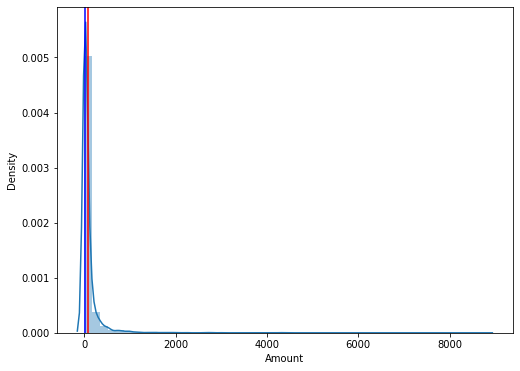

In [23]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df['Amount'])
plt.axvline(df['Amount'].mean(), color='red')
plt.axvline(df['Amount'].median(), color='blue')
plt.show()

3. Kalkulasikan skewness untuk melihat distribusi dari dataset

In [24]:
df.skew()

Amount    13.883489
dtype: float64

   - Skeweness bernilai lebih dari 1
   - bernilai positive
   - mean > median
   
   dapat disimpulakn bahwa distribusi berbentuk Right-Skewness

4. karena distribusi berbentuk skewness maka diperlukan extreme value analysis menggunakan IQR

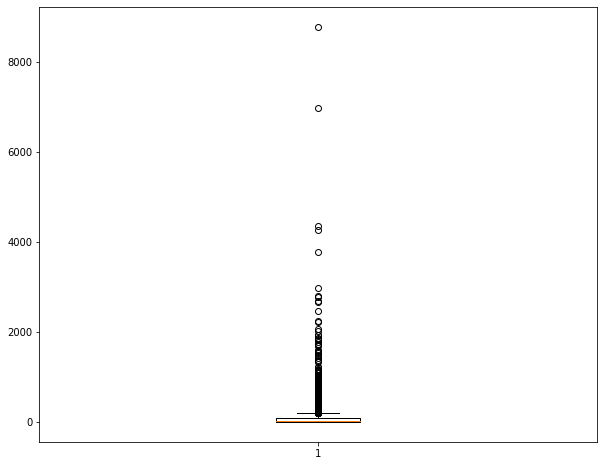

In [25]:
#cek visualisai outlier/anomali data menggunakan boxplot

plt.figure(figsize=(10, 8))
plt.boxplot(df['Amount'])
plt.show()

In [26]:
#hitungg IQR menggunakan quantile dengan formula seperti di bawah, karena extreme case maka value pengali batas atas dan bawah yaitu 3

q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 3 * iqr
upper_bound = q3 + 3 * iqr

#cek anomali data yang terbuang batas atas dan bawah iqr
outliers = df[(df['Amount'] > upper_bound ) | (df['Amount'] < lower_bound)]
outliers

,Amount
6,500.00
13,374.96
20,505.97
36,955.42
56,980.31
...,...
4916,576.30
4942,710.87
4955,380.00
4976,557.85


5. bandingkan data awal dengan data anomali data atau outlier yang sudah diseleksi sebelumnya

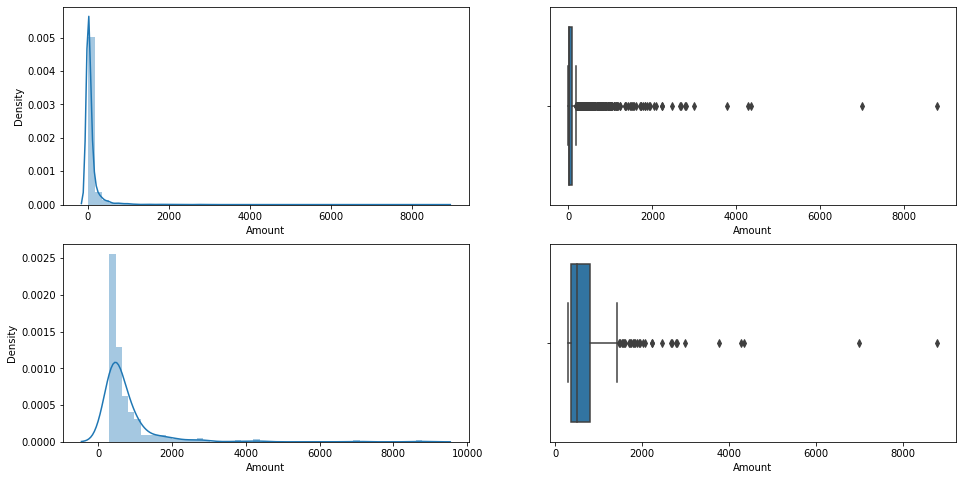

In [27]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Amount'])
plt.subplot(2,2,2)
sns.boxplot(df['Amount'])
plt.subplot(2,2,3)
sns.distplot(outliers['Amount'])
plt.subplot(2,2,4)
sns.boxplot(outliers['Amount'])
plt.show()

6. buat dataframe baru dari seleksi outlier yang dikalkulasikan sebelumnya

In [42]:
new_df = df.copy()
new_df['Amount'] = np.where(
    new_df['Amount'] > upper_bound,
    upper_bound,
    np.where(
        new_df['Amount'] < lower_bound,
        lower_bound,
        new_df['Amount']
    )
)

In [41]:
df2 = df[(df['Amount'] < upper_bound ) & (df['Amount'] > lower_bound)]
df2

,Amount
0,27.81
1,7.99
2,48.24
3,4.49
4,37.48
...,...
4995,0.89
4996,69.99
4997,12.60
4998,9.99


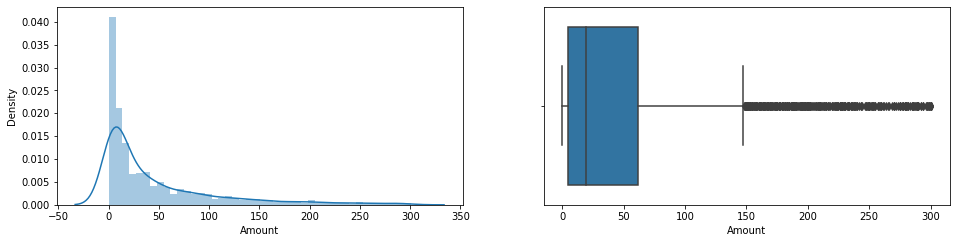

In [43]:
#visalisasikan dataframe baru tanpa anomali data/outlier
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2['Amount'])
plt.subplot(2,2,2)
sns.boxplot(df2['Amount'])
plt.show()

In [46]:
#cek mean dari dataframe baru
new_df['Amount'].mean()


62.586024

7. Hypothesis testing menggunakan 1 sample test dimana, data awal digunakan sebagai populasi sedangkan data baru digunakan sebagai sampel

H0: μ = 91

H1: μ != 91

In [31]:
t_stat, p_val = stats.ttest_1samp(new_df['Amount'], 91)
print('P-value:',p_val/2) 
print('t-statistics:',t_stat)

P-value: 1.2020656271118932e-114
t-statistics: -23.328491800608656


8. hasil dari t-test menunjukan bahwa p-value lebih kecil dari 0.05, sehingga kita bisa menolak H0

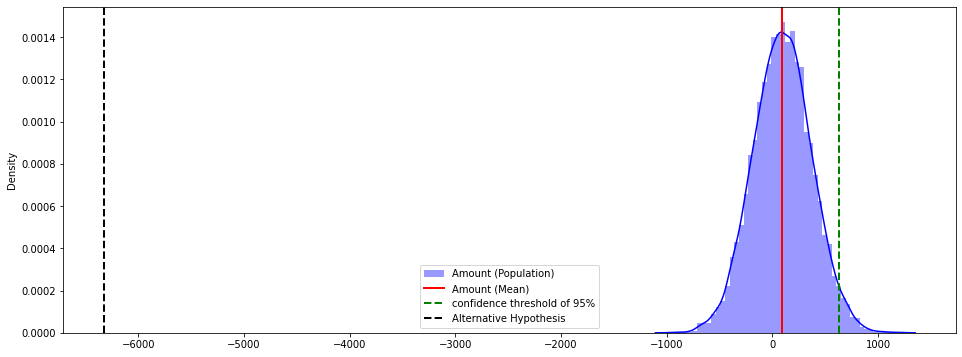

In [32]:
#visualisasikan data populasi dengan alternate hypothesis
pop_amount = np.random.normal(df['Amount'].mean(), df['Amount'].std(), 10000)

ci = stats.norm.interval(0.95, df['Amount'].mean(), df['Amount'].std())

plt.figure(figsize=(16,6))
sns.distplot(pop_amount, label='Amount (Population)', color='blue')
plt.axvline(df['Amount'].mean(), color='red', linewidth=2, label='Amount (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(pop_amount.mean() + t_stat*pop_amount.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

### Hasil dan Kesimpulan

1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu

    - Mean : 91.79115800000001
    - Median : 23.619999999999997
    - Mode : 1.0

    untuk kecerendungan data bergerak ke kiri dengan nilai mean > median

2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu

    setelah pengecekan distribusi dari data, didapatkan bahwa data memliki nilai skew = 13.88, itu berarti lebih dari 1 yang dimana batas dari distribusi normal, sehingga membentuk Right-Skewness

3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data

    teknik yang digunakan pada kasus kali ini yaitu menggunakan seleksi IQR (inter-quantile range), karena distribusi yang terbentuk dari data adalah distribusi tidak normal atau dalam hal ini Right-skewness, sehingga tidak bisa menggunakan cara lain
    karena dalam ini menurut saya extreme case, maka dalam mencari lower dan upper bound, digunakan iqr * 3

4. Ada berapa banyak data yang merupakan outlier? apakah cukup signifikan jumlahnya? (anggap bahwa jumlah signifikan lebih dari 50%). Jelaskan jawabanmu!
    data yang terdeteksi outlier berjumlah 329, ini tidak terlalu siginifikan karena belum menyentuh 50%, tetapi sepengetahuan saya, bahwa meskipun outlier diluar dari boxplot, namun datanya berdekatan dengan lower atau upper, data tersebut tidak harus dihapuskan

5. Setelah kamu menyingkirkan outlier dari data dan melakukan uji hipotesis, apakah ada perbedaan yang signifikan? jelaskan jawabanmu!

    setelah diuji hipotesisnya, alternative hipotesis memiliki perbedaan yang signifikan terhadap null hipotesis dengan t-stat -23.32, sehingga dapat disimpulkan bahwa terdapat anomali data pada data awal 

#### KESIMPULAN

kesimpulan dari analisis data 5000 transaksi ecommerce, terdapat 329 outliers atau anomali data, mesikipun belum siginifikan atau lebih dari 50%, tetapi data anomali tersebut sangat berpengaruh terhadap data secara keseluruhan, sehingga saran kami, untuk menyingkirkan data anomali sebelum digunakan lebih lanjut